In [2]:
import numpy as np
from michigrad.michigrad.visualize import show_graph
from michigrad.michigrad.engine import Value
from michigrad.michigrad.nn import Module, Neuron, Layer, MLP

In [ ]:
np.random.seed(41)  
modelo = MLP(2,[2,1])
for layer in modelo.layers:
    for n in layer.neurons:
        n.nonlin = False


xs = [[0,0],[0,1],[1,0],[1,1]]
ys = [0, 1 , 1, 0]
yHats = [modelo(x) for x in xs]

#se imprimen los valores predichos por el modelo
yHats

[Value(data=0.0, grad=0, name=),
 Value(data=-0.14994577414645047, grad=0, name=),
 Value(data=-0.20121871446691947, grad=0, name=),
 Value(data=-0.3511644886133699, grad=0, name=)]

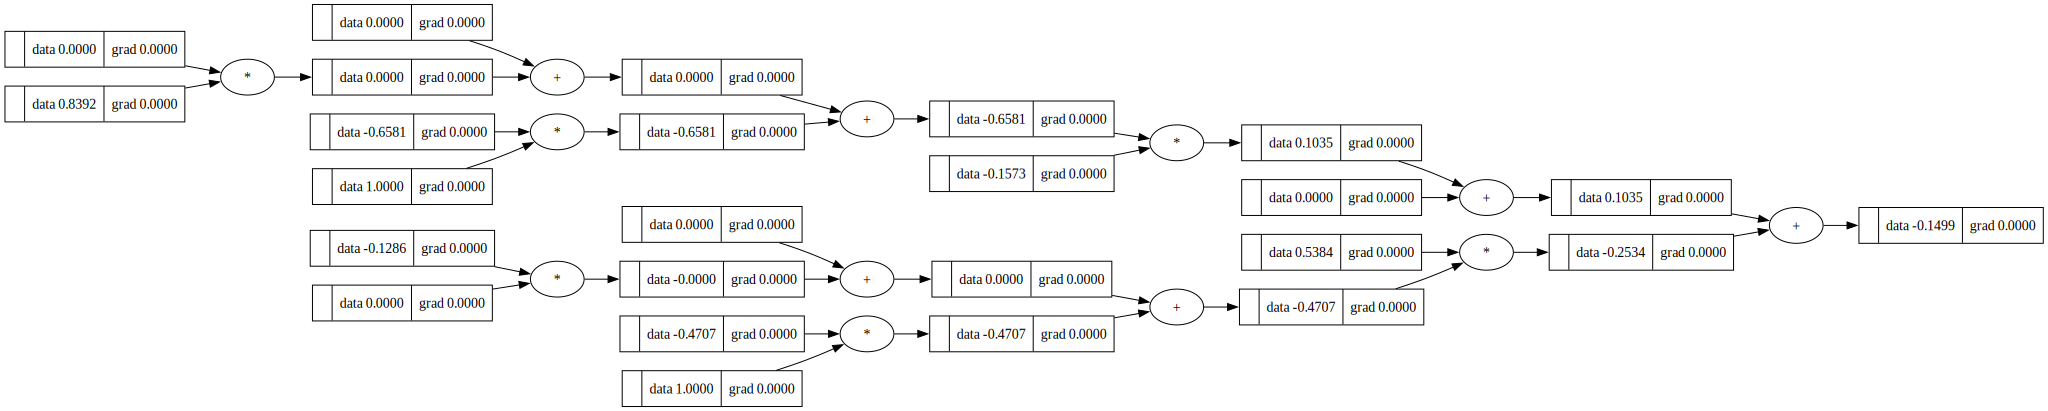

In [ ]:
#muestra el grafo computacional del modelo para la primera prediccion (resultado de la etapa forward)
show_graph(yHats[0])

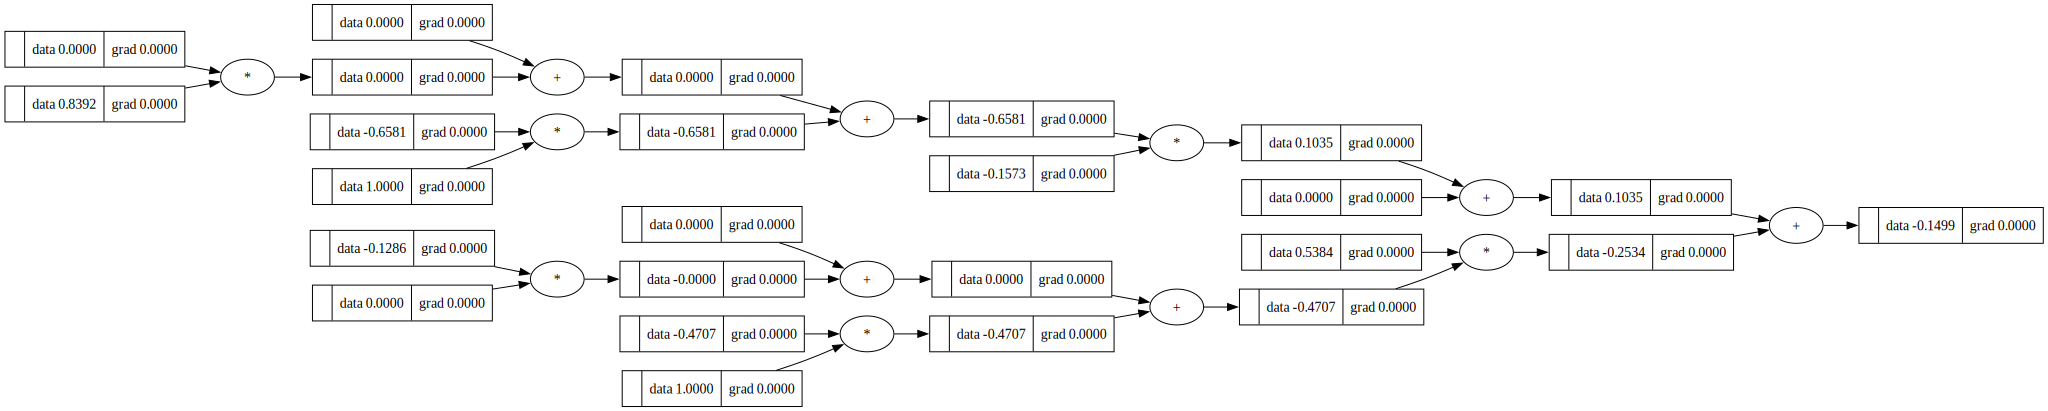

In [ ]:
#grafico del grafo computacional para la segunda prediccion (resultado de la etapa forward)
show_graph(yHats[1])

In [ ]:
#Bucle de entrenamiento del modelo 

lr = 0.01
step = 1000
resultados = []
for _ in range(step):
    #forward pass
    yHats = [modelo(x) for x in xs]

    #calculo de la perdida (loss)
    loss = sum([(y-yhat)**2 for y,yhat, in zip(ys, yHats)])/4

    #Gradientes en cero
    for p in modelo.parameters():
        p.grad = 0
    
    #backward pass
    loss.backward()

    #Se agregan los resultados de la perdida para graficar
    resultados.append(loss.data)

    #Actualizacion de los pesos
    for p in modelo.parameters():
        p.data -= p.grad*lr

loss

Value(data=0.25047809832081724, grad=1, name=)

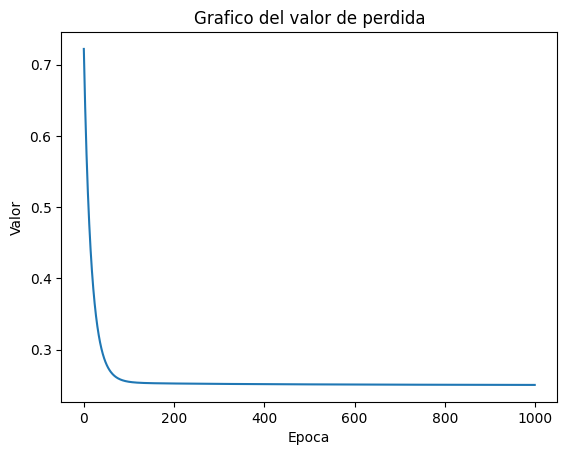

In [10]:
#funcion para graficar el valor de perdida del modelo

import matplotlib.pyplot as plt 


plt.plot(resultados)

plt.title("Grafico del valor de perdida")
plt.xlabel("Epoca")
plt.ylabel("Valor")

plt.show()


In [ ]:
#Resultados finales del modelo despues del entrenamiento
xs = [[0,0],[0,1],[1,0],[1,1]]
print(modelo(xs[0]),modelo(xs[1]),modelo(xs[2]),modelo(xs[3]))

Value(data=0.5318294421101633, grad=0, name=) Value(data=0.5004773453260335, grad=0, name=) Value(data=0.5014606276234306, grad=0, name=) Value(data=0.4701085308393008, grad=0, name=)


Con los resultados anteriores, se demuestra que no se puede implemantar la funcion XOR con una unica capa con dos neuronas lineales